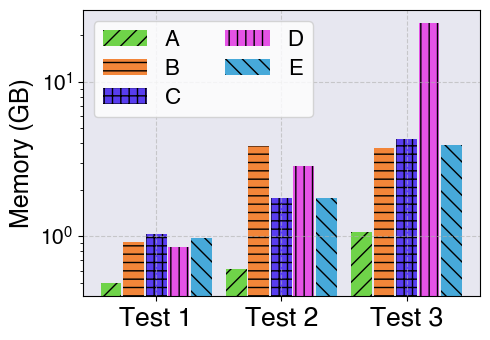

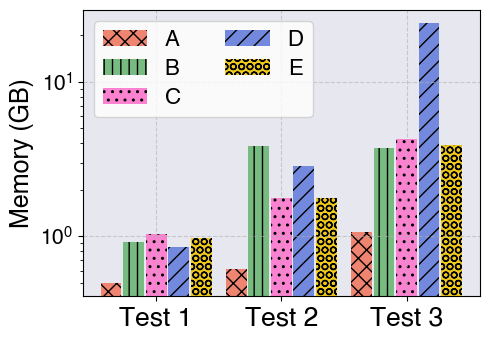

In [65]:
"""
柱状图程序1,适用于常规数据显示
Author: Shizhe Liu
Last date: 2024-6-24
"""

import matplotlib.pyplot as plt
import numpy as np


def draw_bar(results, x_labels, colors, method_labels, hatches, filename='test.pdf', facecolor='#E7E7F0'):
    """results是一个m*n二维数组,m是方法的数量,n是横坐标标签的数量"""

    # 我们先验证一下数据是不是符合规范的,不规范直接退出
    methods_num = len(results)
    len_x = len(x_labels)
    if np.array(results).ndim != 2 or len(results[0]) != len_x:
        print('results应该是二维数组,传入的维度是:', np.array(results).ndim)
        print('传入的横坐标标签数量是:', len_x, ',传的实验数据的横坐标标签数是:', len(results[0]))
        exit()
    
    """第1步:设置画布大小,调整坐标轴范围"""
    # 默认的图大小是(6.4, 4.8),根据之前经验来说,如果放两个图,设置5x3.5会比较好看
    plt.figure(figsize=(5, 3.5))
    # 一般而言,我们想控制纵坐标显示的范围,这样显示会更突出自己方法优势,这里注释掉,供后期微调
    # plt.ylim(0.4, 50)
    # 控制横坐标显示的范围,这样图片显示会更加紧凑,这里注释掉,供后期微调
    # plt.xlim(-0.5, 2.5)

    """第2步:设置字体、图片标题、背景颜色和网格线"""
    # 设置字体,可选 'Times New Roman', 'Helvetica', 'serif', 'Georgia', 'Arial'
    plt.rc('font',family='Helvetica')
    # 一般来说我们不会设置标题,这里注释掉
    # plt.title('xxx', fontsize=22)
    # 设置背景颜色,也可以这么设置 plt.figure(facecolor='blue', edgecolor='black'),这里edgecolor是图表区的边框线颜色
    plt.gca().set_facecolor(facecolor)
    # 方格线,风格有'-.', ':', '--'; linewidth可以控制粗细; alpha是透明度,默认1
    plt.grid(linestyle="--", alpha=0.6)

    """第3步:确定标签的位置"""
    # 假设x轴的某个标签对应的m个方法占1个单位的长度
    total_width = 0.9
    single_width = total_width / methods_num
    # 一个柱子的宽度,之所以乘0.92是为了让相邻的柱子之间有空隙
    bar_width = single_width * 0.92
    # 一个标签占一个单位->[0,1,...]
    plt_positions = np.arange(len_x)
    
    """第4步:开始画柱状图"""
    for i in range(methods_num):
        offset_positions = single_width * (i - (methods_num >> 1))
        if methods_num % 2 == 0:
            offset_positions += 0.5 * single_width
        draw_positions = plt_positions + offset_positions
        # 调用bar即可画出柱状图
        plt.bar(draw_positions, results[i], width=bar_width, label=method_labels[i], color=colors[i], hatch = hatches[i])

    """第5步:设置y轴数值显示大小、刻度、标签和x轴的标签"""
    # 设置y轴数值显示字体
    plt.yticks(fontsize=15)
    # 如果纵坐标数值差距明显则开启log坐标 
    plt.yscale("log")  
    # 设置y轴标签内容,如需加粗,加上,fontweight='bold'
    plt.ylabel("Memory (GB)", fontsize=18) 
    # 设置了x_labels,此时需要替代默认的x标签值,如需加粗,加上fontweight='bold'
    plt.xticks(plt_positions, x_labels, fontsize=19)

    """第6步:设置图例,保存并显示"""
    # 设置图例显示,这里的门道就比较多了,需要调整的参数比较多,比较关键的参数如下
    # 【ncol】表示显示几列,这里选择还是根据方法的数量,柱状图高度决定的
    # 【loc】控制标签显示的位置,默认是自适应的,有时候需要微调,可选参数:'upper left', 'center left', ...还是不行则bbox_to_anchor=(x,y)调整
    # 【labelspacing】是调整每行标签的间隙,如果需要调整,设置0.2~0.5范围
    # 【columnspacing】控制每列的间隙,正常要是handletextpad的两倍会好看些
    # 【handletextpad】控制的是图句柄贺文字之间的间隙,正常0.5会比较好看
    # 【handlelength】图列句柄长度,正常设置为2会比较好看
    plt.legend(prop = {'size':16}, ncol=2, labelspacing = 0.35)
    # 调用tight_layout,这样图片显示的会更加紧凑,建议加上去
    plt.tight_layout()
    # 文件名请自己设定,一定要先保存再展示
    plt.savefig(filename)
    plt.show()                         
    
# -------------------------------------------------------
# 理论上应该从文件中读取数据,然后把数据存入到results中
# 实验结果,多少行表示有多少个方法,多少列表示有多少组实验（x轴标签数量）    
results = [
    [0.49609375, 0.609375, 1.0703125],
    [0.9140625, 3.87109375, 3.71875],
    [1.0390625, 1.7578125, 4.26953125],
    [0.84765625, 2.83203125, 24.058],
    [0.98046875, 1.7695312, 3.91796875]
]

# 这个颜色以及背景来自于learned index一篇文章配色,似乎是alex?
x_labels = ['Test 1', 'Test 2', 'Test 3']
colors1 = ['#6FD349', '#F28539', '#583DEF', '#E553E6', '#47A9D9']
# 之所以有双次出现是为了让其密度更高 ['/', '\', '|', '-', '+', 'x'] ['o', 'O', '.', '*']
hatches1 = ['//', '--', '++', '||', '\\\\']
method_labels = ['A', 'B', 'C', 'D', 'E']

# 颜色来自于MapEmbed: Perfect Hashing with High Load Factor and Fast Update
# [橙色,绿色,紫色,黄色,蓝色,粉色,灰色]
# ['#f29a55', '#2cc62c', '#8865d6', '#ffd100', '#598aea', '#d565d0', '#b5ae60']
colors2 = ['#f29a55', '#2cc62c', '#8865d6', '#598aea', '#ffd100']
hatches2 = ['xx', '||', '..', '//', 'OO']
# 这里是我的颜色
colors3 = ['#ef8471', '#77bb81', '#fb81d1', '#7389dd', '#f0ca1a']
draw_bar(results, x_labels, colors1, method_labels, hatches1, filename='bar1.pdf')
draw_bar(results, x_labels, colors3, method_labels, hatches2, filename='bar3.pdf') # facecolor='#ffffff'

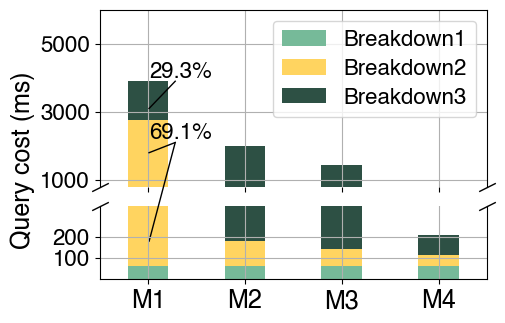

In [66]:
"""
柱状图程序2,适用于代价分解图,且需要截断操作,y轴是等距坐标而非对数坐标
Author: Shizhe Liu
Last date: 2024-6-24
"""

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

def draw_breakdown_bar(results, x_labels, colors, breakdown_labels, top_ylim, top_grid, 
                       bottom_limt, bottom_grid, filename='test.pdf'):
    """
    results: 是一个m*n二维数组,m分解的代价数量,n是方法的数量,注意分解的代价从底端到顶端排列
    x_labels: x轴标签,这里是对应的方法名字
    colors: 每个分解成的代价颜色
    method_labels: 方法的标签
    top_ylim: 长度为2的一维数组,顶部图的y轴标签范围 [top_min, top_max]
    top_height: 顶端图每个横线距离
    bottom_limt: 长度为2的一维数组,底部图的y轴标签范围 [bottom_min, bottom_max]
    bottom_limt: 底端图每个横线距离
    """

    # 我们先验证一下数据是不是符合规范的,不规范直接退出
    methods_num = len(results)
    len_x = len(x_labels)
    if np.array(results).ndim != 2 or len(results[0]) != len_x or len(breakdown_labels) != len(results):
        print('results应该是二维数组,传入的维度是:', np.array(results).ndim)
        print('传入的横坐标标签数量是:', len_x, ',传的实验数据的横坐标标签数是:', len(results[0]))
        print('代价分解标签数量是:', len(breakdown_labels), ',传的实验数据的代价种类是:', len(results))
        exit()
    if len(top_ylim) != 2 or np.array(top_ylim).ndim != 1 or len(bottom_limt) != 2 or np.array(bottom_limt).ndim != 1:
        print('top_ylim和bottom_limt都是长度为2的一维数组')
    elif top_ylim[0] >= top_ylim[1] or bottom_limt[0] >= bottom_limt[1] or bottom_limt[1] >= top_ylim[0]:
        print('上下截断数值设置错误')

    """第1步:设置画布大小,调整坐标轴范围"""
    # height_ratios参数控制上图和下图的比例
    fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True, figsize=(5, 3.5), gridspec_kw={'height_ratios': [6, 2.5]})
    # 调整上下子图的间距
    fig.subplots_adjust(hspace=0.15)  
    # 设置两个图的y轴标签范围
    ax_top.set_ylim(top_ylim[0], top_ylim[1])
    ax_bottom.set_ylim(bottom_limt[0], bottom_limt[1])
    plt.xlim(-0.5, len_x -0.5)

    """第2步:设置字体、标题"""
    # 设置字体,可选 'Times New Roman', 'Helvetica', 'serif', 'Microsoft YaHei', 'Arial'
    plt.rc('font',family='Helvetica')
    # 一般来说我们不会设置标题,这里注释掉
    # plt.title('Figure title', fontsize=22)


    """第3步:确定标签的位置"""
    bar_width = 0.42
    x_pos = np.arange(len_x)

    """第4步:开始画柱状图"""
    y_bottom = np.array(len(x_labels)) * 0.0
    for i in range(len(breakdown_labels)):
        # 顶部的图
        ax_top.bar(x_pos, results[i], width=bar_width, label=breakdown_labels[i], color=colors[i], bottom=y_bottom)
        # 底部的图
        ax_bottom.bar(x_pos, results[i], width=bar_width, label=breakdown_labels[i], color=colors[i], bottom=y_bottom)
        y_bottom = y_bottom + results[i]

    """第5步:设置y轴数值显示大小、标签和x轴的标签"""
    ax_top.tick_params(labelsize=16)
    # y值控制y轴标签的上下位置,需要手工微调
    ax_top.set_ylabel('Query cost (ms)', fontsize=18, y = 0.15)
    # 在顶部图中显示标签
    ax_top.legend(ncol = 1, prop={'size': 16}, labelspacing = 0.35)
    # 设置顶端y轴数值线显示
    top_axis = np.arange(top_grid[0], top_grid[1], top_grid[2])
    ax_top.set_yticks(top_axis)
    ax_bottom.tick_params(labelsize=16)
    # 设置底端y轴数值线显示
    bottom_axis = np.arange(bottom_grid[0], bottom_grid[1], bottom_grid[2])
    ax_bottom.set_yticks(bottom_axis)
    ax_bottom.set_xticks(x_pos)
    # 在底端显示x轴标签,加粗则加上,fontweight='bold'
    ax_bottom.set_xticklabels(x_labels,fontsize=18)
    ax_top.spines.bottom.set_visible(False)
    ax_bottom.spines.top.set_visible(False)
    # 显示网格
    ax_top.grid()
    ax_bottom.grid()

    """第5步:画断轴,画百分比"""
    # 创建轴断刻度线,d用于调节其偏转角度
    d = 0.5
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax_top.plot([0, 1], [0, 0], transform=ax_top.transAxes, **kwargs)
    ax_bottom.plot([0, 1], [1, 1], transform=ax_bottom.transAxes, **kwargs)
    
    # 下面的代码是显示百分比的,由于显示百分比要固定位置,没办法自适应调整,这里需要用户自己微调
    # 这里算出每个方法的总代价
    sum_cost = [0] * len_x
    for i in range(len_x):
        cur_cost = 0
        for j in range(len(breakdown_labels)):
            cur_cost = cur_cost + results[j][i]
        sum_cost[i] = cur_cost  
    # 方法编号'M1'
    id = 0
    small_space = 0.01
    # 方法1的第三个breakdown cost比分比显示,保留了一位小数
    ax_top.text(x_pos[id] + small_space, 4000, str(round(results[2][id]/sum_cost[0]*100, 1)) + '%', fontsize=16, color='black')
    # 画横线,这里画着很麻烦,如果有wps会员可以用wps补横线,第一个参数是线段的起点终点x轴坐标,第二个参数是线段的起点终点y轴坐标
    ax_top.plot([small_space, 0.28], [3100, 3900], color = 'black', linestyle='-', linewidth = 1)
    # 方法1的第二个breakdown cost比分比显示,保留了一位小数
    ax_top.text(x_pos[id] + small_space, 2200, str(round(results[1][id]/sum_cost[0]*100, 1)) + '%', fontsize=16, color='black')
    ax_top.plot([small_space, 0.28], [1800, 2100], color = 'black', linestyle='-', linewidth = 1)

    # 由于跨图了,这里使用ConnectionPatch函数画线端
    # pointA是起点坐标,pointB是终点坐标
    # axesA是起点在哪个子图里(这里A点在底部子图中,因此axesA=ax_bottom),axesB是终点在哪个子图里
    con = ConnectionPatch(xyA=(small_space, 180), xyB=(0.28, 2100), coordsA="data", coordsB="data",
                          axesA=ax_bottom, axesB=ax_top, color="black", linestyle="-", linewidth=1)
    ax_bottom.add_artist(con)
    # 后续的代码自行补全...（很繁琐,推荐wps会员补横线）
    
    """第6步:保存并显示"""
    # 这里不建议加上tight_layout,因为会导致截距很大,为了让图片在pdf显示更紧凑,我们使用bbox_inches参数
    # plt.tight_layout()
    # 文件名请自己设定,一定要先保存再展示
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

# -------------------------------------------------------
# 理论上应该从文件中读取数据,然后把数据存入到breakdown_results中
# 目前四个方法,整体的代价分解成三个部分
breakdown_results = [
    [62, 63, 64, 61],
    [2707, 120, 79, 53],
    [1147, 1807, 1289, 95]
]
# 方法名字
x_labels = ['M1', 'M2', 'M3', 'M4']

# 每个组成的颜色,颜色长度可以大于breakdown_labels长度
colors = ['#76BA99', '#FFD460', '#2D5044', '#A149FA', '#EA5455']  
breakdown_labels = ['Breakdown1', 'Breakdown2', 'Breakdown3']
# 顶端图的y轴显示范围
top_ylim = [800, 6000]
# 控制顶端图grid显示,三元组[x,y,z] x:开始显示刻度,y:终止显示刻度,z:间距
top_grid = [1000, 6000, 2000]
# 底端图的y轴显示范围
bottom_limt = [0, 350]
# 控制底端图grid显示,三元组[x,y,z] x:开始显示刻度,y:终止显示刻度,z:间距
bottom_grid = [100, 300, 100]
draw_breakdown_bar(breakdown_results, x_labels, colors, breakdown_labels, 
                   top_ylim, top_grid, bottom_limt, bottom_grid)

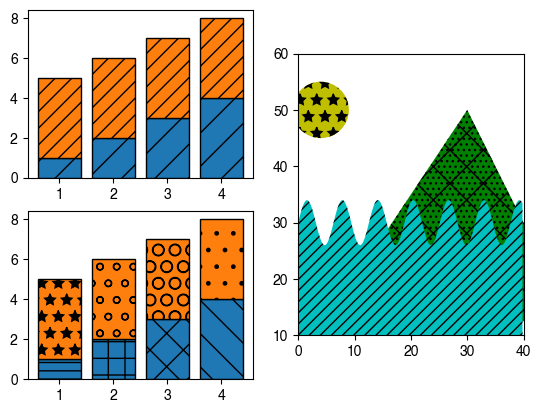

In [68]:
"""
简单的柱状图代码如下
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon

x = np.arange(1, 5)
# 设置y1的值是[1,2,3,4]
y1 = np.arange(1, 5)
# 设置y2的值是[4,4,4,4]
y2 = np.ones(y1.shape) * 4

fig = plt.figure()
axs = fig.subplot_mosaic([['bar1', 'patches'], ['bar2', 'patches']])

axs['bar1'].bar(x, y1, edgecolor='black', hatch="/")
axs['bar1'].bar(x, y2, bottom=y1, edgecolor='black', hatch='//')

axs['bar2'].bar(x, y1, edgecolor='black', hatch=['--', '+', 'x', '\\'])
axs['bar2'].bar(x, y2, bottom=y1, edgecolor='black',
                hatch=['*', 'o', 'O', '.'])

x = np.arange(0, 40, 0.2)
axs['patches'].fill_between(x, np.sin(x) * 4 + 30, y2=0,
                            hatch='///', zorder=2, fc='c')
"""
1. add_patch的hatch设置
"""
axs['patches'].add_patch(Ellipse((4, 50), 10, 10, fill=True,
                                 hatch='*', facecolor='y'))
axs['patches'].add_patch(Polygon([(10, 20), (30, 50), (50, 10)],
                                 hatch='x...', facecolor='g'))
axs['patches'].set_xlim([0, 40])
axs['patches'].set_ylim([10, 60])
axs['patches'].set_aspect(1)
plt.show()
